In [683]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [684]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression

## 1. Exploratory Data Analysis
**Loading Data**

In [685]:
books_fp = os.path.join('data', 'AllBooks_baseline_DTM_Labelled.csv')
books = pd.read_csv(books_fp)
books.head()

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data Cleaning**

**Checking for duplicate indexes**

In [686]:
books = books.rename(columns = {'Unnamed: 0' : 'Book'})
books.head()

,Book,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [687]:
books.duplicated().any()

False

**Checking for null values**

In [688]:
books.isnull().any().any()

False

**Book Names**

In [689]:
series = books["Book"]
names = series.str.split("_").str[0].unique().tolist()
names

['Buddhism',
 'TaoTeChing',
 'Upanishad',
 'YogaSutra',
 'BookOfProverb',
 'BookOfEcclesiastes',
 'BookOfEccleasiasticus',
 'BookOfWisdom']

## 2. Initial Visualizations

**Buddhism Top 20 Words**

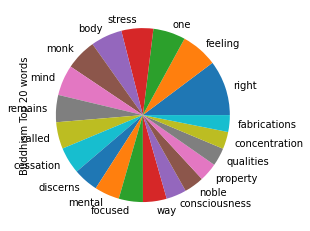

In [690]:
cols = []
total_buddhism = books[series.str.contains(names[0])].sum(axis = 0)[1:]
top20_buddhism = total_buddhism.sort_values(ascending = False)[:20]
top20_buddhism.plot.pie(label = "Buddhism Top 20 words")
cols += top20_buddhism.index.tolist()

**TaoTeChing Top 20 Words**

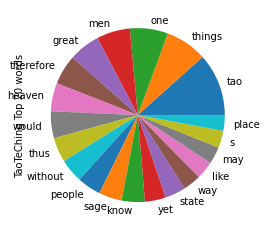

In [691]:
total_taoteching = books[series.str.contains(names[1])].sum(axis = 0)[1:]
top20_dao = total_taoteching.sort_values(ascending = False)[:20]
top20_dao.plot.pie(label = "TaoTeChing Top 20 words")
cols += top20_dao.index.tolist()

**Upanishad Top 20 Words**

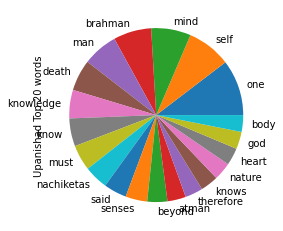

In [692]:
total_upanishad = books[series.str.contains(names[2])].sum(axis = 0)[1:]
top20_upanishad = total_upanishad[total_upanishad > 0].sort_values(ascending = False)[:20]
top20_upanishad.plot.pie(label = "Upanishad Top 20 words")
cols += top20_upanishad.index.tolist()

**YogaSutra Top 20 Words**

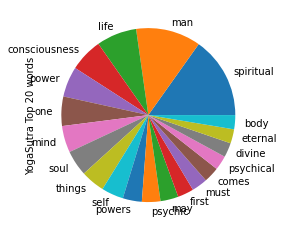

In [693]:
total_yogasutra = books[series.str.contains(names[3])].sum(axis = 0)[1:]
top20_yogasutra = total_yogasutra.sort_values(ascending = False)[:20]
top20_yogasutra.plot.pie(label = "YogaSutra Top 20 words")
cols += top20_yogasutra.index.tolist()

**BookofProverb Top 20 Words**

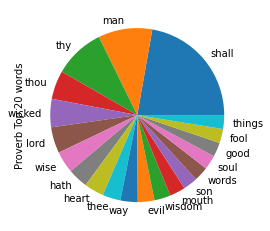

In [694]:
total_proverb = books[series.str.contains(names[4])].sum(axis = 0)[1:]
top20_proverb = total_proverb.sort_values(ascending = False)[:20]
top20_proverb.plot.pie(label = "Proverb Top 20 words")
cols += top20_proverb.index.tolist()

**BookofEcclesiastes Top 20 Words**

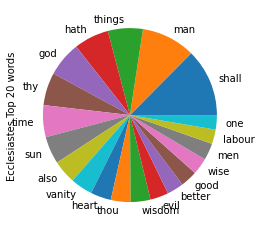

In [695]:
total_ecclesiastes = books[series.str.contains(names[5])].sum(axis = 0)[1:]
top20_eccl = total_ecclesiastes.sort_values(ascending = False)[:20]
top20_eccl.plot.pie(label = "Ecclesiastes Top 20 words")
cols += top20_eccl.index.tolist()

**BookofEcclesiasticus Top 20 Words**

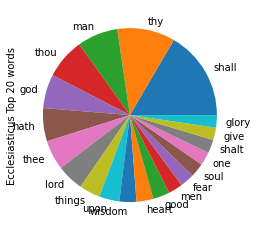

In [696]:
total_ecclesiasticus = books[series.str.contains(names[6])].sum(axis = 0)[1:]
top20_ecclus = total_ecclesiasticus.sort_values(ascending = False)[:20]
top20_ecclus.plot.pie(label = "Ecclesiasticus Top 20 words")
cols += top20_ecclus.index.tolist()

**BookofWisdom Top 20 Words**

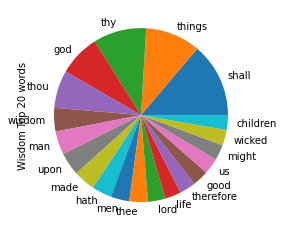

In [697]:
total_wisdom = books[series.str.contains(names[7])].sum(axis = 0)[1:]
top20_wisdom = total_wisdom.sort_values(ascending = False)[:20]
top20_wisdom.plot.pie(label = "Wisdom Top 20 words")
cols += top20_wisdom.index.tolist()

**Top 20 Words Overall**

<AxesSubplot:ylabel='Top 20 words'>

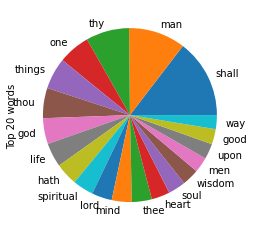

In [31]:
overall = books.sum()[1:].sort_values(ascending = False)[:20]
overall.plot.pie(label = "Top 20 words")

**Combined Results**

In [32]:
df = pd.DataFrame(columns = books.columns)
for i in names:
    row1 = books[series.str.contains(i)].sum(axis = 0)[1:]
    ser = pd.Series(i).append(row1)
    df = df.append(ser, ignore_index = True)
df = df.rename(columns = {0 : "Book"})
df = df.iloc[: , 1:]
df = df.set_index("Book", drop = True)

In [33]:
df = df[cols]
df = df.loc[:,~df.columns.duplicated()]
df

,right,feeling,one,stress,body,monk,mind,remains,called,cessation,...,labour,upon,fear,shalt,give,glory,made,us,might,children
Book,,,,,,,,,,,,,,,,,,,,,
Buddhism,128,85,75,74,73,72,71,63,62,62,...,0,0,0,0,1,0,26,2,1,0
TaoTeChing,7,5,51,0,4,0,9,1,13,0,...,0,1,6,0,8,1,8,2,4,2
Upanishad,6,0,100,0,30,0,71,8,12,0,...,0,8,12,0,17,10,6,6,2,2
YogaSutra,16,5,108,2,52,0,98,7,9,2,...,0,28,14,6,6,3,17,44,7,9
BookOfProverb,18,0,23,0,1,0,15,0,6,0,...,2,27,25,28,28,15,13,9,1,13
BookOfEcclesiastes,3,0,19,0,1,0,11,0,1,0,...,19,12,7,3,6,1,14,2,5,6
BookOfEccleasiasticus,11,0,77,0,11,0,20,0,8,0,...,5,115,81,76,71,71,64,13,13,43
BookOfWisdom,4,0,20,0,5,0,3,0,7,0,...,8,37,12,0,6,8,35,26,25,24


### Preliminary Observations
**The word "man"**

Based on the pie charts, we can observe that the word "man" comes up as the top 10 words for 7 out of 8 books (excluding Buddhism). Thus, it can be deduced that determining a random book through the use of the word "man" can be pretty unreliable as it can come from any 7 book.

Additionally, this makes sense from a contextual standpoint since the aim of religious texts is to provide an explanation for the question of man's origin. The exception to this is Buddhism, whose central doctrine on the Four Noble Truths focus on human suffering, rather than existence itself. 

## 3. Data Visualization


While the pie charts above are useful for displaying the top few words, it becomes hard to distinguish the differences in size between smaller slices. A more intuitive way to visualize the data is...

separate by book and cluster??

## 4. Top 20
Below are the top 20 words that appear in each book, and the top 20 words that appear throughout all the books.

In [711]:
pd.DataFrame({"Buddhism":top20_buddhism.index.tolist(), "Daoism":top20_dao.index.tolist(), "Upanishad":top20_upanishad.index.tolist(), "Yogasutra":top20_yogasutra.index.tolist(), "Proverbs":top20_proverb.index.tolist(), "Ecclesiastes":top20_eccl.index.tolist(), "Eccleasiasticus":top20_ecclus.index.tolist(), "Overall":overall.index.tolist()})

,Buddhism,Daoism,Upanishad,Yogasutra,Proverbs,Ecclesiastes,Eccleasiasticus,Overall
0,right,tao,one,spiritual,shall,shall,shall,shall
1,feeling,things,self,man,man,man,thy,man
2,one,one,mind,life,thy,things,man,thy
3,stress,men,brahman,consciousness,thou,hath,thou,one
4,body,great,man,power,wicked,god,god,things
5,monk,therefore,death,one,lord,thy,hath,thou
6,mind,heaven,knowledge,mind,wise,time,thee,god
7,remains,would,know,soul,hath,sun,lord,life
8,called,thus,must,things,heart,also,things,hath
9,cessation,without,nachiketas,self,thee,vanity,upon,spiritual


## 5. Old Testament
**Three of the books (Proverbs, Ecclesiastes, Wisdom) are part of the Old Testament, but
are spread out in time of founding. Define a model to determine how the wording has changed from the Book Of Proverbs to the Book of Wisdom. This is an open-ended question, so you may choose to answer it in any manner appropriate, as long as you use a machine learning method.**


We proceed to look at the difference between certain parts of the same text. The Old Testament would be a good reference; of all the religions examined in this report, Judeo-Christian history is particularly lengthy, and covers different subjects in each book.

In order to determine how the choice of diction changes between the text, it would be best to look at a subsection of the Old Testament that is written by the same author, to ensure that differences in diction are due to differences in theme and not a factor of the author's writing style.

The aim of this section is to build a machine learning model that determines the wording has changed between the Book of Proverbs, Ecclesiastes, and Wisdom.

The assumption is that the words used in each book are different enough, so we hypothesize that it is possible to build a classification model that predicts which book a chapter is from, given the word counts in that chapter.

The next few blocks of code aim to achieve this using multiple logistic regression. Logistic regression is a method used to predict the categorical dependent variable; "multiple" refers to having multiple independent variables. In this case, our set of independent variables are the set of keywords/columns.

$$y = w_1x_1 + w_2x_2 + ...$$
$$book = w_1word_1 + w_2word_2 + ...$$



The block of code below creates a copy of the original `books` dataframe, but with only chapters from the three relevant books. Then, it assigns each chapter a numerical value based on its book: `1` for Proverbs, `2` for Ecclesiastes, and `3` for Wisdom. The `head()` function is used to display the first few rows.

In [712]:
ot = books.loc[books["Book"].str.contains('|'.join(["Ecclesiastes", "Proverb","Wisdom"]))]
ot["book"] = ot['Book'].apply(lambda x: 1 if "Proverb" in x else (2 if "Ecclesiastes" in x else 3))
ot.head()

<ipython-input-712-8c7823dc14fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ot["book"] = ot['Book'].apply(lambda x: 1 if "Proverb" in x else (2 if "Ecclesiastes" in x else 3))


,Book,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
478,BookOfProverb_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,BookOfProverb_Ch2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480,BookOfProverb_Ch3,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
481,BookOfProverb_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,BookOfProverb_Ch5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


The rows of the data are first shuffled using the `.sample()` function, to ensure that when the data is partitioned, it is done so via a random sample. This distributes the books (which have a different number of chapters each) across all the samples, so that the test and train datasets are comprehensive. 

Then, the dataset is split. 75% of the rows are delegated into the "train" dataset, and 25% are used in the "test" dataset. This split prevents overfitting--a phenomenon where the model generated is too well fit to the training data, and is unable to reliably predict training data.

In [713]:
#shuffle dataset
ot = ot.sample(frac=1)

#split into train and test, 75-25
idx = (int)(len(ot)*0.75)
X_train = ot.iloc[:idx].drop(labels = "Book", axis = 1)
y_train = ot.iloc[:idx]["book"]

X_test = ot.iloc[idx:].drop(labels = "Book", axis = 1)
y_test = ot.iloc[idx:]["book"]

Below is the code used to train and test a Logistic Regression classification model. 

The model is then run on the chapters in the test data, and the output is saved to `yhat`. This is formatted into a dataframe, which enables us to easily compare the model's predictions against the actual books. The model's accuraccy is also calculated and displayed.

In [714]:
#model
clf = LogisticRegression(random_state = 0, C=100)
clf.fit(X_train, y_train)

#predict
yhat = clf.predict(X_test)

#view results
results = pd.DataFrame({'predicted':yhat.tolist(),'actual':y_test.to_list()})
results['correct'] = results['predicted'] == results['actual']

accuracy = results['correct'].sum()/len(y_test)*100
print("accuracy: ", accuracy, "%")
results

accuracy:  93.75 %


,predicted,actual,correct
0,3,3,True
1,3,3,True
2,3,3,True
3,1,2,False
4,1,1,True
5,1,1,True
6,1,1,True
7,1,1,True
8,3,3,True
9,1,1,True


The accuracy indicates that the word counts are unique enough to differentiate between books. To examine this further, we can look at the coefficients of the model. 
Ordinarily this approach does not work, but because the units of the model's independent values (i.e. X, the word counts) are the same, the model's coefficients are of the same magnitude.

Each coefficient is associated with a word; the higher the magnitude of the coefficient, the bigger the role the word plays in determining the identity of the chapter's book. The code block below pairs each coefficient with its corresponding word using a dataframe, and displays the words with the largest (by magnitude) coefficients.

In [715]:
coef = pd.DataFrame({"coef":clf.coef_[0]},index=X_train.columns.to_list())
coef = coef.sort_values("coef",ascending=False)
print("Top 20 most positive coefficients: ", coef.head(20).index.to_list(),'\n')
print("Top 20 most negative coefficients: ", coef.tail(20).index.to_list())

Top 20 most positive coefficients:  ['way', 'mouth', 'son', 'house', 'man', 'wicked', 'prudence', 'woman', 'wise', 'lord', 'lips', 'lest', 'thee', 'thou', 'shalt', 'like', 'poor', 'keep', 'hate', 'instruction'] 

Top 20 most negative coefficients:  ['better', 'upon', 'neither', 'grace', 'tell', 'us', 'time', 'spirit', 'seen', 'works', 'therefore', 'power', 'things', 'know', 'also', 'vanity', 'labour', 'sun', 'book', 'god']


**Other Tests**


The logistic regression model created above can be utilized to confirm our findings. The code block below reorganizes the above process into a function for ease of repetition.

The function takes in a dataframe, trains and tests a logistic regression classification mode, then returns its accuraccy, as well as the 20 most positively and 20 most negatively correlated keywords, and ignores keywords with coefficient 0 (i.e. do not significantly contribute to prediction).

In [721]:
def logr(df, pr):
    #shuffle dataset
    df = df.sample(frac=1)

    #split into train and test, 75-25
    idx = (int)(len(df)*0.75)
    X_train = df.iloc[:idx].drop(labels = "Book", axis = 1)
    y_train = df.iloc[:idx]["book"]

    X_test = df.iloc[idx:].drop(labels = "Book", axis = 1)
    y_test = df.iloc[idx:]["book"]

    #model
    clf = LogisticRegression(random_state = 0, C=100,  max_iter=200)
    clf.fit(X_train, y_train)

    #predict
    yhat = clf.predict(X_test)

    #view results
    results = pd.DataFrame({'predicted':yhat.tolist(),'actual':y_test.to_list()})
    results['correct'] = results['predicted'] == results['actual']

    acc = results['correct'].sum()/len(y_test)*100

    coef = pd.DataFrame({"coef":clf.coef_[0]},index=X_train.columns.to_list())
    coef = coef.sort_values("coef",ascending=False).loc[coef["coef"]!=0]
    top_pos = coef.head(20).index.to_list()
    top_neg = coef.tail(20).index.to_list()
    coef["keyword"] = coef.index
    
    if (pr==True):
        print("accuracy: ", acc, "%\n")
        print("Top 20 most positive coefficients: ", top_pos,'\n') 
        print("Top 20 most negative coefficients: ", top_neg)

    return acc, coef

The code block below prepares a dataframe and uses the function above to create a model that predicts a chapter's book, but only based on the top 20 words that appear in each book. Duplicate words are removed using the line `.loc[:,~ot.columns.duplicated()]`.

In [722]:
ot_top60 = books.loc[books["Book"].str.contains('|'.join(["Ecclesiastes", "Proverb","Wisdom"]))]

#get top 60 words, and get only those columns
p = top20_proverb.index.to_list()
e = top20_eccl.index.to_list()
w = top20_wisdom.index.to_list()
top_60 = ['Book'] + p + e + w
ot_top60 = ot_top60[top_60]

#remove duplicate columns
ot_top60 = ot_top60.loc[:,~ot_top60.columns.duplicated()]

#label each chapter with corresponding book
ot_top60["book"] = ot_top60['Book'].apply(lambda x: 1 if "Proverb" in x else (2 if "Ecclesiastes" in x else 3))

results_60 = logr(ot_top60,True)


accuracy:  93.75 %

Top 20 most positive coefficients:  ['son', 'mouth', 'wicked', 'wise', 'way', 'lord', 'heart', 'children', 'men', 'wisdom', 'evil', 'words', 'better', 'soul', 'thy', 'good', 'man', 'hath', 'one', 'life'] 

Top 20 most negative coefficients:  ['hath', 'one', 'life', 'thou', 'thee', 'us', 'made', 'shall', 'might', 'things', 'time', 'therefore', 'fool', 'also', 'vanity', 'upon', 'labour', 'sun', 'god', 'book']


To get a better understanding of the results, we colour code keywords based on their origin.

- If a keyword has a red background, it is from the Book of Ecclesiastes.
- If a keyword has a blue background, it is from the Book of Wisdom.
- If a keyword has a yellow background, it is from the Book of Proverbs.

Similarly, 

- White: all 3.
- Purple: Wisdom and Ecclesiastes.
- Orange: Proverbs ad Ecclesiastes.
- Green: Wisdom and Proverbs.


In [723]:
keywords = results_60[1]


def in_statements(key):
    if key in set(w) & set(p) & set(e):
        color = 'white'
    elif key in set(w) & set(p):
        color = 'yellowgreen'
    elif key in set(p) & set(e):
        color = 'orange'
    elif key in set(w) & set(e):
        color = 'mediumpurple'
    elif key in e:
        color = 'red'
    elif key in p:
        color = 'yellow'
    elif key in w:
        color = "blue"
    else:
        color = 'white'
    return 'background-color: %s' % color

keywords = keywords.style.applymap(in_statements).hide_index()
keywords

coef,keyword
0.838143,son
0.673321,mouth
0.537448,wicked
0.454013,wise
0.423099,way
0.400523,lord
0.250620,heart
0.243478,children
0.229877,men
0.209928,wisdom


It is interesting to note that the book of Proverbs (yellow) overall has keywords with strong positive correlations, and the book of Ecclesiastes (red) has strong negative correlations. The book of wisdom has more moderate correlations--it seems to play a less significant role in predicting a chapter's book--which possibly indicates that its word count has less unique characteristics. 

Given this information, the code block below uses the function above to analyze only two books: Proverbs and Ecclesiastes.

In [724]:
no_wis = books.loc[books["Book"].str.contains('|'.join(["Ecclesiastes", "Proverb"]))]

#label each chapter with corresponding book
no_wis["book"] = no_wis['Book'].apply(lambda x: 1 if "Proverb" in x else 2)

results_no_wis = logr(no_wis, True)

<ipython-input-724-82465cf18fcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_wis["book"] = no_wis['Book'].apply(lambda x: 1 if "Proverb" in x else 2)


accuracy:  90.9090909090909 %

Top 20 most positive coefficients:  ['sun', 'vanity', 'god', 'also', 'many', 'better', 'days', 'book', 'state', 'things', 'yet', 'know', 'youth', 'labour', 'ecclesiastes', 'vain', 'knowest', 'time', 'together', 'done'] 

Top 20 most negative coefficients:  ['shalt', 'wisdom', 'house', 'father', 'fool', 'woman', 'knowledge', 'shall', 'instruction', 'little', 'prudence', 'like', 'mouth', 'lips', 'friend', 'son', 'wicked', 'way', 'thee', 'lord']


The keywords are again colour coded.
- Red keywords are from Ecclesiastes.
- Blue keywords are from Proverbs.
- Purple keywords are from both.

In [725]:
keywords = results_no_wis[1]

def in_statements(key):
    if key in set(p) & set(e):
        color = 'mediumpurple'
    elif key in e:
        color = 'red'
    elif key in p:
        color = 'skyblue'
    else:
        color = 'white'
    return 'background-color: %s' % color

k_top = keywords.head(20).style.applymap(in_statements).hide_index()
k_bot = keywords.tail(20).style.applymap(in_statements).hide_index()

k_top #display 20 most positive coefs

coef,keyword
0.436424,sun
0.436398,vanity
0.419400,god
0.297834,also
0.250573,many
0.224902,better
0.203032,days
0.192029,book
0.173208,state
0.170174,things


In [726]:
k_bot #display 20 most negative coefs

coef,keyword
-0.111250,shalt
-0.111774,wisdom
-0.122168,house
-0.123867,father
-0.124862,fool
-0.127259,woman
-0.130603,knowledge
-0.136733,shall
-0.141654,instruction
-0.147212,little


The code blocks above use `head()` and `tail()` to show the most positive and negative coefficients. As expected, keywords from Proverbs's top 20 most used are on one end, and keywords from Ecclesiastes's top 20 most used keywords are on the other.

### Results
This indicates that keywords `god`, `sun`, `vanity`, `better`, and `labour` are more unique to Ecclesiastes, while keywords like `lord`, `wicked`, `way`, `son`, `thee`, and `mouth` are more unique to Proverbs.


**Context**

Some research is needed to contextualize the results.

The Book of Proverbs reads like a lecture for the reader--it aims to give words of warning, insight, and instruction. Much of Ecclesiastes, on the other hand, is a first-person recounting of the author's life experiences. The Book of Wisdom details and explains the functions of Wisdom itself.

The first two books' superscriptions (chapter 1, verse 1) identify them as being written by King Solomon, who, in Judeo-Christian theology, is remembered for his supernatural wisdom and great wealth (Encyclopaedia Britannica). Solomon lived from c. 975 BCE - c. 926 BCE; the Book of Proverbs contains passages that date back to 700 BCE (Encyclopaedia Britannica). 

The Book of Wisdom is also attributed to King Solomon, but is not included in Hebrew Canon or the Protestant Old Testament, nor recognized as Scripture by the early church; it was added, much later, to the Roman Catholic Old Testament by the Countil of Rome in 382 AD. Early Jewish historians like Flavius Josephus also did not recognize the Book of Wisdom.

According to the Encyclopaedia Britannica, The Book of Wisdom is most probably written by "a Jew in Alexandria sometime during the 1st century BC," in Koine Greek (for context, Proverbs, Ecclesiastes, and the rest of the Hebrew canon were likely written in either Hebrew or Arameic).


**Implications for the hypothesis**

Given this information, it is hard to conclude that the differences in choice of diction between the three books are a result of different time of founding. The data used in this report simply reflects the word counts of different keywords found in religious texts--and on top of that, they've been translated into English, losing any nuance the original languages may have carried--because of this, we lose the ability to draw a correlation between the words used and date of founding.

A more straightforward, plausible conclusion is that **the differences in wording are a result of the different theme of each book; it is inconclusive if diction choice is impacted by author, language, or time.**








**Model Summary**

We also summarize the performance of the logistic regression model. Earlier, the model was applied once to three different datasets; the code block below trains and tests the model on each dataset 10 times.

In [727]:
ot_accuracy = [logr(ot,False)[0] for x in range(10)]
top60_accuracy = [logr(ot_top60,False)[0] for x in range(10)]
nowis_accuracy = [logr(no_wis,False)[0] for x in range(10)]

A dataframe is created with the accuracy (i.e. what % of predictions are correct) of each trial, and the mean, minimum, and maximum accuracy for each model are displayed using `describe()`.

In [728]:
a = pd.DataFrame({"All 3 books, all keywords":ot_accuracy, "All 3 books, top keywords": top60_accuracy, "Proverbs and Ecclesiastes, all keywords":nowis_accuracy})
a

,"All 3 books, all keywords","All 3 books, top keywords","Proverbs and Ecclesiastes, all keywords"
0,87.50,68.75,90.909091
1,100.00,81.25,90.909091
2,100.00,81.25,100.000000
3,93.75,87.50,100.000000
4,81.25,87.50,81.818182
5,93.75,75.00,90.909091
6,93.75,81.25,100.000000
7,100.00,81.25,90.909091
8,93.75,75.00,90.909091
9,93.75,93.75,90.909091


In [729]:
a.describe().loc[['mean','max','min','std']]

,"All 3 books, all keywords","All 3 books, top keywords","Proverbs and Ecclesiastes, all keywords"
mean,93.750000,81.250000,92.727273
max,100.000000,93.750000,100.000000
min,81.250000,68.750000,81.818182
std,5.892557,7.216878,5.749596


All three models perform relatively well; the first dataset with all three books and all keywords provided the most consistently accurate results, but the last dataset with only Proverbs and Ecclesiastes allowed for the most intuitive visualization. Overall, all three models were a useful exercise.

## 6. Buddhism vs Taoism

Since Buddhism and Taoism are believed to influence one another, we will be investigating their similarities simply through their word usage in their texts. Through this, we will see if their practices and beliefs can be deduced by simply looking at the way their texts are worded. 

In [739]:
print("Taoism:\n", top20_dao[:10])
print('\nBuddhism:\n', top20_buddhism[:10])

Taoism:
 tao          84
things       56
one          51
men          45
great        42
therefore    40
heaven       38
would        36
thus         33
without      32
dtype: object

Buddhism:
 right        128
feeling       85
one           75
stress        74
body          73
monk          72
mind          71
remains       63
called        62
cessation     62
dtype: object


**Hypotheses**

For the first hypothesis, without any background knowledge between Buddhism and Taoism, we can deduce that **both Taoism and Buddhism pay a lot of attention on way of life and mental greatness.** "Tao" is a philosophy, a way of thinking, and it is the most common word in the text "TaoTeChing", while in Buddhism, the most common words include "mind", "feeling", and "stress, which are all either mentally or emotionally related. Furthermore, from the word "therefore" in Taoism, and the word "right" from Buddhism, we believe that this corresponds to their idea of "righteousness" and reasoning.

Secondly, there is a common word that appears in both Taoism and Buddhism, which is **the word "one". This implies that both religions emphasize the idea of unity, which based on the first point, can be deduced that it is the idea of inner peace (unity of mind and emotions).**

Finally, we can see that these two religions **start to diverge from one another from their word usage when it comes to the end of life**. In Taoism, the word "heaven" is commonly used, while the word that is most closely related to the afterlife is "cessation", which simply means the end to something. Thus, we can conclude that Taoism pays more emphasis on the afterlife, but not Buddhism. 

**Resarch**

To confirm our three hypotheses, we compared them against several online sources:

Taoism:
 - Believes that everything comes in a pair (dark and light, hot and cold), and that they don't make sense by themselves alone.
 - Taoism books are mostly guides on how to live with this concept of "Tao" (balance and harmony)
 - Taoists believe in spiritual immortality, where the spirit of the body joins the universe after death.

Buddhism:
 - Life is endless since people will be reincarnated over and over again (Death simply leads to rebirth)
 - No state, good or bad, lasts forever.
 - Lead a decent life (part of the Five Precepts)
 
**Conclusions**

Firstly, we can conclude that **our first hypothesis is right**: Both religions focus on the idea of righteousness. This is reflected in Taoism's concept of "Tao" and Buddhism's Five Precepts, which is their guide for daily life, which emphasizes on being good. 

Our **second hypothesis does not sound exactly right**. Although Taoism does believe in the idea of unity, or to be exact, meaning in pairs, it does not necessarily reflect Buddhism. Instead, Buddhism believes in the idea of a cycle, where suffering comes after happiness, and so on and so forth. Thus, although Buddhism phrases this concept differently, they both have the same concept where both glory and suffering have to coexist, and that one cannot exist without the other.

Finally, **our last hypothesis also matches the descriptions of both religions** gotten from online sources. In Taoism, the idea of "heaven" is different from what we commonly perceive nowadays. Instead, Taoists believe that gods live in the sun, the moon, and the constellations, and that we can visit this home of theirs (or "heaven") after we die. In contrast, Buddhists do not believe in the afterlife. Instead, they believe in the idea that life repeats after death, also known as reincarnation or rebirth. This explains why they use the word "cessation" to represent the end of life.

## Conclusion

To conclude our long project, every religion's belief is reflected by their central text, and their choice of words greatly reflect the kinds of practices and beliefs they prioritize. By analyzing the words they use most frequently, we can compare and contrast different religions' beliefs at a surface level. 

However, there is a common trap that we have to be wary of when analyzing these texts simply through word frequency: generalizing. Each one of the words in the dataset has been taken out of context of the religion--for example, on hearing the word "heaven", those more familiar with the West will likely first picture the Christian heaven--a paradise in the afterlife, filled with angels and goodness. However, to others, "heaven" may be associated with Taoism's constellations. The number of times "heaven" is mentioned overall does nothing to faithfully represent the doctrine of a religion.

As touched on in the Old Testament section, it's it's also somewhat unethical for us as analysts to ignore the history of each of these texts, and the nuances of the words themselves--many of which have been translated from other languages. The word Hebrew word "nephesh", for example, is translated into English as "soul"--one of the top 20 featured in this report. While this isn't entirely wrong, because of Greco-Roman polytheistic influence, English-speakers often associate "soul" with a "non-material essence of a human that survives after death," but "nephesh" refers to "humans as living, breathing, physical beings, or just to life itself".

These are just a few examples of why we have to be very careful; these texts reflect histories and worldviews from the beginning of civilization and are sensitive to people to this day.